In [ ]:

import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score ,  precision_score, recall_score, f1_score, confusion_matrix


# to make this notebook's output stable across runs
np.random.seed(42)




# Fetching Mnist Dataset

In [ ]:


from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1, cache=True, return_X_y=True )



In [ ]:

# Use the notion of y=f(X)
y = y.astype(int)



In [ ]:

print('Data size: {0} x {1} and label size {2}'.format( X.shape[0] ,   X.shape[1]  ,  y.shape[0] ) )
print('The images are of size: {0} x {0}'.format(math.sqrt (X.shape[1])   ))



Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


In [ ]:

X =  X.to_numpy( )




# Test and Training Data

Split data into test and training data after re-shuffling the data. We can simply take the first 60000 as training and the last 10000 as test.

In [ ]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,  y, test_size = 0.1, stratify=y, random_state=42)


In [ ]:

print(  " The Number of Training data is " ,  X_train.shape[0] )
print(  " The Number of Testing data is "  ,  X_test.shape[0] )



 The Number of Training data is  63000
 The Number of Testing data is  7000


In [ ]:


from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier( hidden_layer_sizes= ( 200 , 400 , 150 , 100) ,   max_iter=10,solver='sgd',verbose='true',validation_fraction=0.0)

MLP_model.fit(X_train, y_train)




Iteration 1, loss = 1.31655236
Iteration 2, loss = 0.35438469
Iteration 3, loss = 0.27957069
Iteration 4, loss = 0.23424830
Iteration 5, loss = 0.20627457
Iteration 6, loss = 0.18562844
Iteration 7, loss = 0.16899309
Iteration 8, loss = 0.15429678
Iteration 9, loss = 0.14246543
Iteration 10, loss = 0.13332715


C:\Users\Hussien_PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 400, 150, 100), max_iter=10,
              solver='sgd', validation_fraction=0.0, verbose='true')

In [ ]:


print( MLP_model.n_layers_ )

print( MLP_model.hidden_layer_sizes)

for layer in range( MLP_model.n_layers_-1 ):
    print( "Layer " , layer , "Weights " , MLP_model.coefs_[layer].shape , "Bias is " , MLP_model.intercepts_[layer].shape )  

    

6
(200, 400, 150, 100)
Layer  0 Weights  (784, 200) Bias is  (200,)
Layer  1 Weights  (200, 400) Bias is  (400,)
Layer  2 Weights  (400, 150) Bias is  (150,)
Layer  3 Weights  (150, 100) Bias is  (100,)
Layer  4 Weights  (100, 10) Bias is  (10,)


In [ ]:

y_pred = MLP_model.predict(X_train)
y_pred_test = MLP_model.predict(X_test)

 

In [ ]:


from sklearn.metrics import classification_report
import seaborn as sns 


def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  )  # to represent accuacy, precision, recall and f1 score

    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
    
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6213
           1       0.97      0.98      0.97      7089
           2       0.94      0.90      0.92      6291
           3       0.95      0.87      0.91      6427
           4       0.96      0.89      0.92      6142
           5       0.94      0.89      0.91      5682
           6       0.94      0.96      0.95      6188
           7       0.93      0.95      0.94      6564
           8       0.79      0.95      0.86      6142
           9       0.88      0.90      0.89      6262

    accuracy                           0.92     63000
   macro avg       0.93      0.92      0.92     63000
weighted avg       0.93      0.92      0.92     63000

Confusion Matrix
[[5876    0   18    5   12   10   31   10  250    1]
 [   1 6978   17    6    5   13    5   13   48    3]
 [  23   40 5638   65   50    4   84   64  312   11]
 [   1   21  208 5574    2  178    8   98  

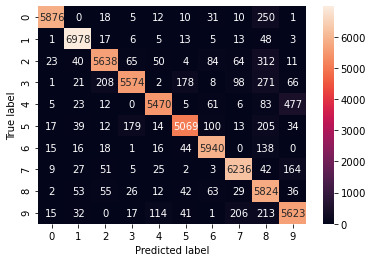

In [ ]:
drawing_conf_matrix( y_train , y_pred)


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       690
           1       0.95      0.98      0.97       788
           2       0.93      0.91      0.92       699
           3       0.92      0.84      0.88       714
           4       0.95      0.86      0.90       682
           5       0.92      0.87      0.90       631
           6       0.94      0.97      0.95       688
           7       0.94      0.94      0.94       729
           8       0.80      0.93      0.86       683
           9       0.84      0.89      0.87       696

    accuracy                           0.91      7000
   macro avg       0.92      0.91      0.91      7000
weighted avg       0.92      0.91      0.91      7000

Confusion Matrix
[[651   0   4   0   2   2   4   0  26   1]
 [  1 773   1   2   0   3   0   1   6   1]
 [  1   6 637   9   6   1   8   7  22   2]
 [  1   4  30 599   0  24   3  15  34   4]
 [  0   4   1   0 584   1   8 

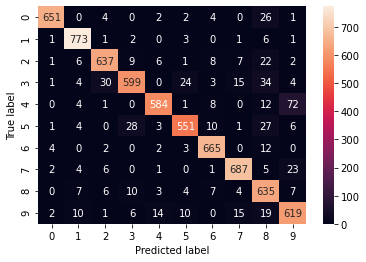

In [ ]:
drawing_conf_matrix( y_test, y_pred_test  )
